In [1]:
import numpy as np
import pandas as pd

In [2]:
from pandas import Series, DataFrame

## 5.1 Introduction to pandas Data Structures(pandas的数据结构介绍)

#### Series: 由一组数据（各种NumPy数据类型）以及一组与之相关的数据标签（即索引）组成

In [3]:
obj = Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [4]:
obj.values # 返回value

array([ 4,  7, -5,  3], dtype=int64)

In [5]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [6]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [7]:
obj2['a']

-5

In [8]:
obj2['d'] = 6
obj2[['c', 'a', 'd']]

c    3
a   -5
d    6
dtype: int64

In [9]:
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

In [10]:
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

In [11]:
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

In [12]:
'b' in obj2 #检测index是否在series中

True

In [13]:
'e' in obj2

False

In [14]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000} # creat a dict
obj3 = pd.Series(sdata) # creat a series using dict
obj3 #Series按照dict的顺序排列

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [15]:
states = ['California', 'Ohio', 'Texas', 'Oregon']
obj4 = pd.Series(sdata, index = states)
obj4 #有序排列

California        NaN
Ohio          35000.0
Texas         71000.0
Oregon        16000.0
dtype: float64

In [16]:
pd.isnull(obj4) #检测是否为nan

California     True
Ohio          False
Texas         False
Oregon        False
dtype: bool

In [17]:
pd.notnull(obj4)

California    False
Ohio           True
Texas          True
Oregon         True
dtype: bool

In [18]:
obj4.isnull()

California     True
Ohio          False
Texas         False
Oregon        False
dtype: bool

In [19]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [20]:
obj4

California        NaN
Ohio          35000.0
Texas         71000.0
Oregon        16000.0
dtype: float64

In [21]:
obj3 + obj4 # 根据运算的索引标签自动对齐数据

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

In [22]:
# Series.name属性的应用
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          35000.0
Texas         71000.0
Oregon        16000.0
Name: population, dtype: float64

In [23]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [24]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan'] 
# Series的索引可以通过赋值的方式就地修改
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

DataFrame: 表格型的数据结构，它含有一组有序的列，每列可以是不同的值类型（数值、字符串、布尔值等）

In [25]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],\
        'year': [2000, 2001, 2002, 2001, 2002, 2003],\
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [26]:
frame = pd.DataFrame(data) #使用dict建立pd.DataFrame
frame # 有序排列

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [27]:
frame.head() # 只列出前五行

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [28]:
pd.DataFrame(data, columns = ['year', 'state', 'pop']) #按指定顺序进行排列

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [29]:
# 传入的列在数据中找不到，就会在结果中产生缺失值
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'], 
                      index=['one', 'two', 'three', 'four','five', 'six'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [30]:
# 将DataFrame的列提出生成Series
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [31]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

In [32]:
frame2.loc['three'] #通过DateFrame.loc[index]获取

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [33]:
frame2['debt'] = 16.5 #对column进行赋值
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [34]:
frame2['debt'] = np.arange(6.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


In [35]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,0.0,True
two,2001,Ohio,1.7,1.0,True
three,2002,Ohio,3.6,2.0,True
four,2001,Nevada,2.4,3.0,False
five,2002,Nevada,2.9,4.0,False
six,2003,Nevada,3.2,5.0,False


In [36]:
del frame2['eastern'] # 删除列
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

对返回的Series所做的任何就地修改全都会反映到源DataFrame上，通过Series的copy方法即可指定复制列。

In [37]:
# 用nest dict添加数据进入DataFrame
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
      'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [38]:
frame3.T #转置

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


In [39]:
# 内层dicts的key会被合并、排序以形成最终的索引
pd.DataFrame(pop, index = [2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [40]:
pdata = {'Ohio': frame3['Ohio'][:-1],
        'Nevada': frame3['Nevada'][:2]} #Series组成dicts
pdata

{'Ohio': 2001    1.7
 2002    3.6
 Name: Ohio, dtype: float64,
 'Nevada': 2001    2.4
 2002    2.9
 Name: Nevada, dtype: float64}

In [41]:
pd.DataFrame(pdata) #dicts转换为DataFrame

,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9


In [42]:
frame3.index.name = 'year'; frame3.columns.name = 'state' #表格label
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [43]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

In [44]:
frame2.values

array([[2000, 'Ohio', 1.5, 0.0],
       [2001, 'Ohio', 1.7, 1.0],
       [2002, 'Ohio', 3.6, 2.0],
       [2001, 'Nevada', 2.4, 3.0],
       [2002, 'Nevada', 2.9, 4.0],
       [2003, 'Nevada', 3.2, 5.0]], dtype=object)

In [45]:
obj = pd.Series(range(3), index = ['a','b', 'c'])
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

In [46]:
index[1:]

Index(['b', 'c'], dtype='object')

In [47]:
try:
    index[1] = 'd'
except TypeError:
    print('Index对象是不可变的，因此用户不能对其进行修改')

Index对象是不可变的，因此用户不能对其进行修改


In [48]:
labels = pd.Index(np.arange(3))
labels

Int64Index([0, 1, 2], dtype='int64')

In [49]:
obj2 = pd.Series([1.5, -2.5, 0], index = labels)
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

In [50]:
obj2.index is labels # Index对象在多个数据结构之间安全共享

True

In [51]:
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [52]:
frame3.columns

Index(['Nevada', 'Ohio'], dtype='object', name='state')

In [53]:
'Ohio' in frame3.columns

True

In [54]:
2003 in frame3.index

False

In [55]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar']) 
# pandas的Index可以包含重复的标签
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

In [56]:
frame3.index.append(frame2.index)

Index([2001, 2002, 2000, 'one', 'two', 'three', 'four', 'five', 'six'], dtype='object')

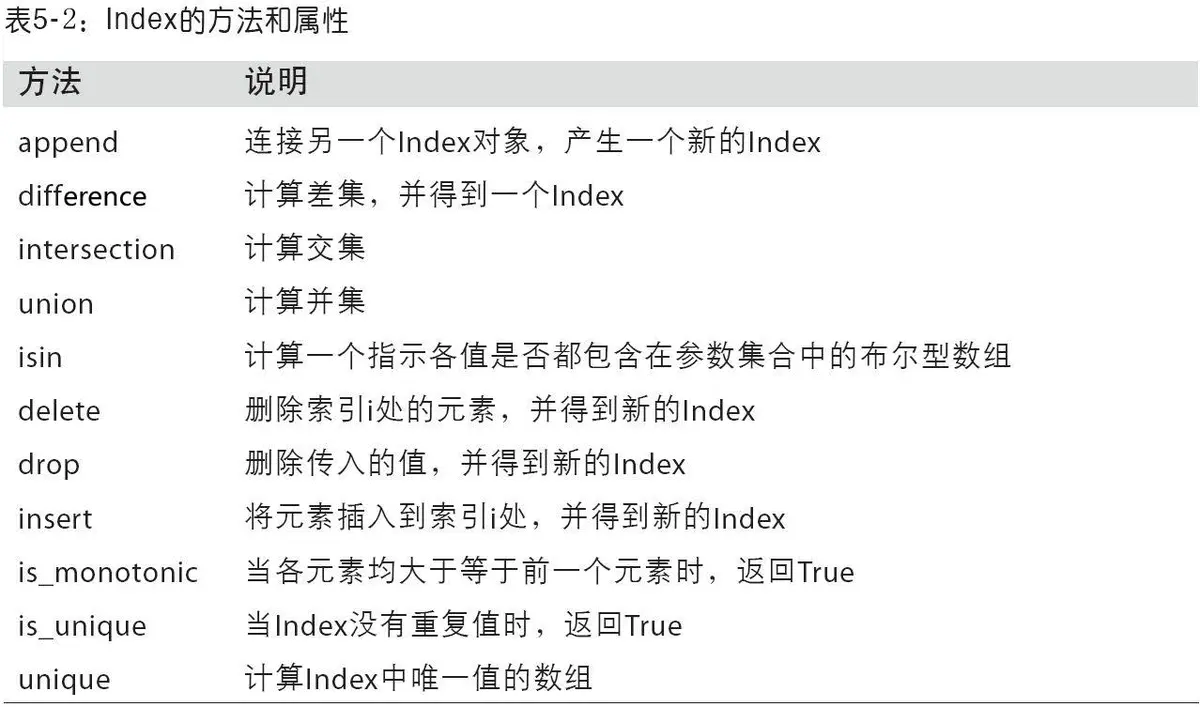

5.2 Essential Functionality(基础功能）

In [57]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index = ['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [58]:
# Series的reindex将会根据新索引进行重排。如果某个索引值当前不存在，就引入缺失值
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [59]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index = [0, 2, 4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [60]:
obj3.reindex(range(6))

0      blue
1       NaN
2    purple
3       NaN
4    yellow
5       NaN
dtype: object

In [61]:
obj3.reindex(range(6), method = 'ffill') # ffill可以实现前向值填充

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [62]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                    index = ['a', 'b', 'c'],
                    columns = ['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
b,3,4,5
c,6,7,8


In [63]:
# reindex可以修改（行）索引和列
frame2 = frame.reindex(['a', 'b', 'c', 'd']) #修改index
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,3.0,4.0,5.0
c,6.0,7.0,8.0
d,NaN,NaN,NaN


In [64]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns = states) #列可以用columns关键字重新索引


,Texas,Utah,California
a,1,NaN,2
b,4,NaN,5
c,7,NaN,8


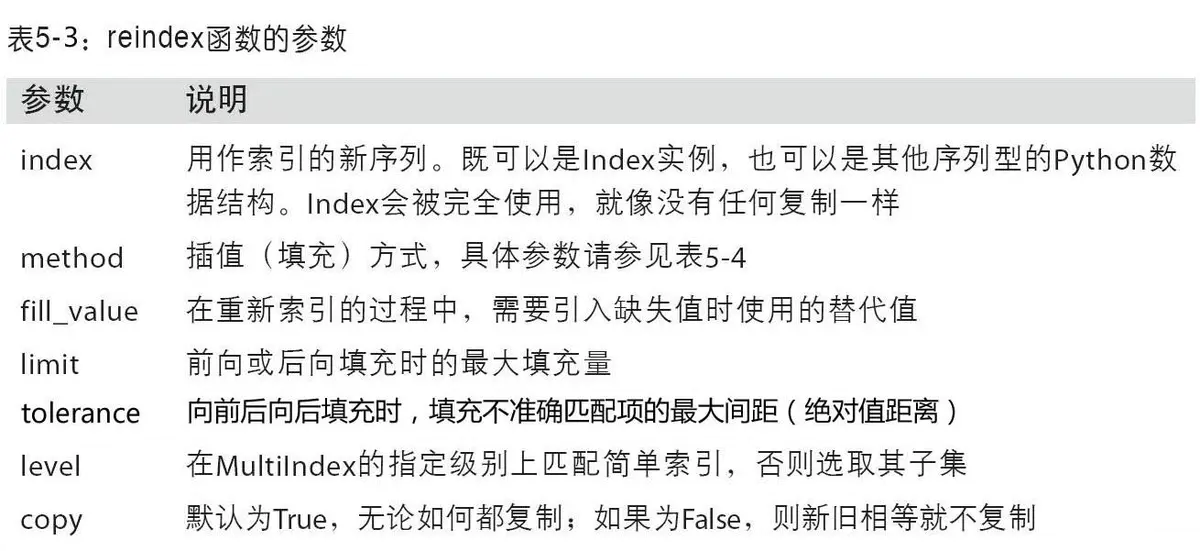

In [65]:
obj = pd.Series(np.arange(5.), index = ['a', 'b', 'c', 'd', 'e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [66]:
# 使用Series.drop()剔除指定对象
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [67]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [68]:
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

In [69]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [70]:
data = pd.DataFrame(np.arange(16).reshape((4,4)),
                   index = ['Ohio', 'Colorado', 'Utah', 'New York'],
                   columns = ['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [71]:
data.drop(['Colorado', 'Ohio']) # 默认删除index

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [72]:
data.drop('two', axis = 1) # axis = 1 or 'columns' 删除列的值

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [73]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [74]:
obj.drop("c", inplace = True) #inplace = True会销毁被删除数据
obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

Indexing, Selection, and Filtering（索引、选取和过滤）

In [75]:
obj = pd.Series(np.arange(4.), index = ['a', 'b', 'c', 'd'])

In [76]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [77]:
obj['b']

1.0

In [78]:
obj[1]

1.0

In [79]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [80]:
obj[['b', 'a','d']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [81]:
obj[[1, 3]]

b    1.0
d    3.0
dtype: float64

In [82]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

In [83]:
obj['b':'c'] = 5
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

In [84]:
data = pd.DataFrame(np.arange(16).reshape((4,4)),
                   index = ['Ohio', 'Colorado', 'Utah', 'New York'],
                   columns = ['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [85]:
data['two'] #返回series

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [86]:
data[['three', 'one']] # 返回DataFrame

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [87]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [88]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [89]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [90]:
data[data < 5] = 0
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


### Selection with loc and iloc (用loc和iloc进行选取)

In [91]:
data.loc['Colorado', ['two', 'three']] #DataFrame.loc()根据index提取

two      5
three    6
Name: Colorado, dtype: int32

In [92]:
data.iloc[2,[3, 0, 1]] #iloc()根据int提取

four    11
one      8
two      9
Name: Utah, dtype: int32

In [93]:
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

In [94]:
data.iloc[[1, 2], [3, 0, 1]]

,four,one,two
Colorado,7,0,5
Utah,11,8,9


In [95]:
data.loc[:'Utah', 'two']

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int32

In [96]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


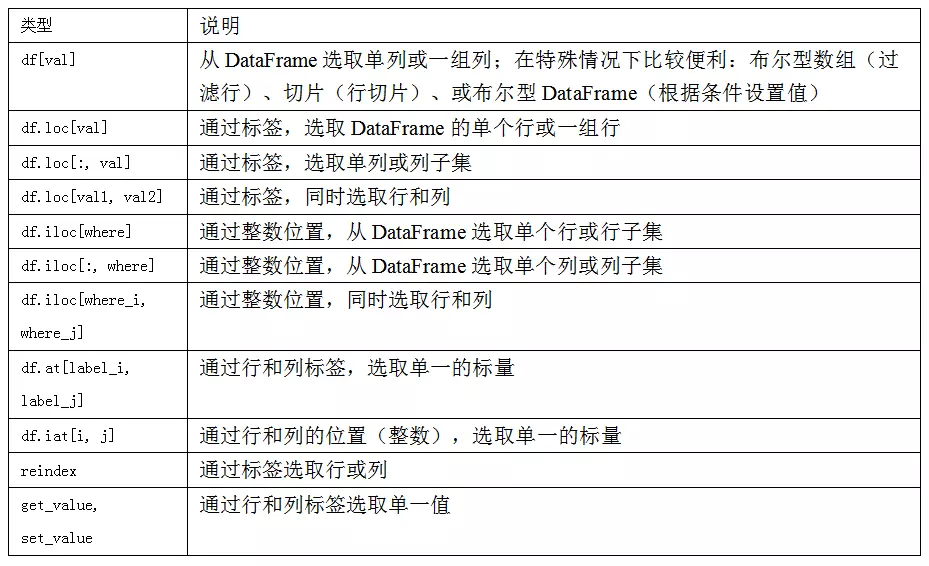

### Integer Indexes（整数索引）

In [97]:
ser = pd.Series(np.arange(3.))

In [98]:
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [99]:
ser2 = pd.Series(np.arange(3.), index = ['a', 'b', 'c'])
ser2[-1]

2.0

In [100]:
ser[:1]

0    0.0
dtype: float64

In [101]:
ser.loc[:1]

0    0.0
1    1.0
dtype: float64

In [102]:
ser.iloc[:1]

0    0.0
dtype: float64

In [103]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index = ['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
              index = ['a', 'c', 'e', 'f', 'g'])

In [104]:
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [105]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [106]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [107]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index = ['Ohio', 'Texas', 'Colorado'])

In [108]:
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns = list('bde'),
                   index = ['Utah', 'Ohio', 'Texas', 'Oregon'])

In [109]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [110]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [111]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


In [112]:
df1.add(df2, fill_value = 0)

,b,c,d,e
Colorado,6.0,7.0,8.0,NaN
Ohio,3.0,1.0,6.0,5.0
Oregon,9.0,NaN,10.0,11.0
Texas,9.0,4.0,12.0,8.0
Utah,0.0,NaN,1.0,2.0


In [113]:
1 / df1

,b,c,d
Ohio,inf,1.000000,0.500
Texas,0.333333,0.250000,0.200
Colorado,0.166667,0.142857,0.125


In [114]:
df1.rdiv(1)

,b,c,d
Ohio,inf,1.000000,0.500
Texas,0.333333,0.250000,0.200
Colorado,0.166667,0.142857,0.125


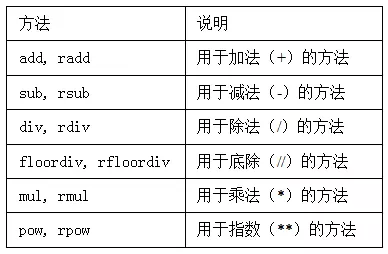

In [115]:
df1.reindex(columns = df2.columns, fill_value = 0) # 指定填充值

,b,d,e
Ohio,0.0,2.0,0
Texas,3.0,5.0,0
Colorado,6.0,8.0,0


### Operations between DataFrame and Series（DataFrame和Series之间的运算）

In [116]:
arr = np.arange(12.).reshape((3, 4))
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [117]:
arr[0]

array([0., 1., 2., 3.])

In [118]:
arr - arr[0] # 计算一个二维数组与其某行之间的差(boardcasting)

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

In [119]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                    columns = list('bde'),
                    index = ['Utah', 'Ohio', 'Texas', 'Oregon'])
series = frame.iloc[0]
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [120]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [121]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [122]:
# 匹配行且在列上广播，必须使用算术运算方法
series2 = pd.Series(range(3), index = ['b', 'e', 'f'])
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


In [123]:
series3 = frame['d']
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [124]:
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [125]:
frame.sub(series3, axis = 'index')

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


Function Application and Mapping(函数应用和映射)

In [126]:
frame = pd.DataFrame(np.random.randn(4, 3),
                    columns = list('bde'),
                    index = ['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.883493,-0.859611,0.876318
Ohio,-1.567546,-0.775645,1.597069
Texas,-0.537307,-2.194070,1.247548
Oregon,0.782344,-0.567391,-1.130069


In [127]:
np.abs(frame)

,b,d,e
Utah,0.883493,0.859611,0.876318
Ohio,1.567546,0.775645,1.597069
Texas,0.537307,2.194070,1.247548
Oregon,0.782344,0.567391,1.130069


In [128]:
f = lambda x: x.max() - x.min()
frame.apply(f) # 将函数应用到由各列或行所形成的一维数组上

b    2.451039
d    1.626679
e    2.727137
dtype: float64

In [129]:
frame.apply(f, axis = 'columns')#计算默认以列计算，axis='columns'设置为行计算

Utah      1.743104
Ohio      3.164615
Texas     3.441617
Oregon    1.912412
dtype: float64

In [130]:
def f(x): # df.apply()生成多个返回值组成的df
    return pd.Series([x.min(), x.max()], index = ['min', 'max'])
frame.apply(f)

,b,d,e
min,-1.567546,-2.194070,-1.130069
max,0.883493,-0.567391,1.597069


In [131]:
format = lambda x: '%.2f' % x # 格式化字符串
frame

,b,d,e
Utah,0.883493,-0.859611,0.876318
Ohio,-1.567546,-0.775645,1.597069
Texas,-0.537307,-2.194070,1.247548
Oregon,0.782344,-0.567391,-1.130069


In [132]:
frame.applymap(format)

,b,d,e
Utah,0.88,-0.86,0.88
Ohio,-1.57,-0.78,1.60
Texas,-0.54,-2.19,1.25
Oregon,0.78,-0.57,-1.13


In [133]:
frame['e'].map(format) #针对series使用map()

Utah       0.88
Ohio       1.60
Texas      1.25
Oregon    -1.13
Name: e, dtype: object

### sorting and ranking （排序与排名）

In [134]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj.sort_index() # 根据key排序

a    1
b    2
c    3
d    0
dtype: int64

In [135]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                       index=['three', 'one'],
                      columns=['d', 'a', 'b', 'c'])
frame.sort_index() # index排序

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [136]:
frame.sort_index(axis = 1) # columns排序

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [137]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values() # 排序时缺省值默认放在series末尾

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [138]:
frame = pd.DataFrame({'b': [4, 7, 2, -2], 'a': [0, 1, 0, 1]})

In [139]:
frame

,b,a
0,4,0
1,7,1
2,2,0
3,-2,1


In [140]:
frame.sort_values(by = 'b')

,b,a
3,-2,1
2,2,0
0,4,0
1,7,1


In [141]:
frame.sort_values(by = ['a', 'b']) # 利用by排序，对于多个列排序按照列表输入顺序

,b,a
2,2,0
0,4,0
3,-2,1
1,7,1


In [142]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4]) #排序，相同数字+0.5
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [143]:
obj.rank(method='first') # 根据大小以及出现的顺序排序

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [144]:
obj.rank(ascending=False, method='max') # 降序排名，'max'输出排名为最大

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [145]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2],
                     'a':[0, 1, 0, 1],
                     'c':[-2, 5, 8, -2.5]})
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [146]:
frame.rank(axis = 'columns')

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


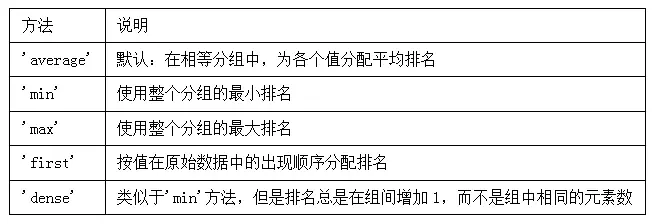

Axis Indexes with Duplicate Labels（带有重复标签的轴索引）

In [147]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [148]:
obj.index.is_unique # 检查index中是否有重复

False

In [149]:
obj['a'] #index对应多个值，返回series

a    0
a    1
dtype: int64

In [150]:
type(obj['c']) # index对应单个值，返回一个标量

numpy.int64

In [151]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
df

,0,1,2
a,0.098275,-1.009898,-1.708667
a,0.037668,1.474172,-1.456016
b,-2.139591,-0.543788,1.355797
b,0.062672,1.481550,0.693409


In [152]:
df.loc['b']

,0,1,2
b,-2.139591,-0.543788,1.355797
b,0.062672,1.481550,0.693409


## 5.3 Summarizing and Computing Descriptive Statistics（汇总和计算描述统计）

In [153]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                  [np.nan, np.nan], [0.75, -1.3]],
                   index=['a', 'b', 'c', 'd'],
                    columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [154]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [155]:
df.sum(axis = 1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [156]:
df.mean(axis = 'columns', skipna = False) #保留NaN值，若列中有NaN则返回NaN

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

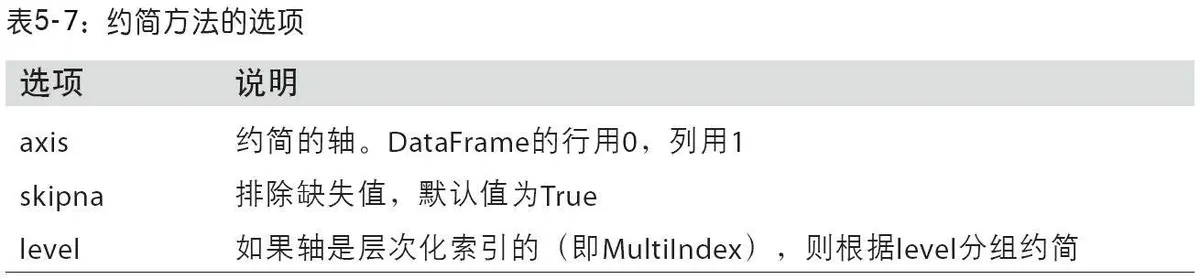

In [157]:
df.idxmax() # 间接统计

one    b
two    d
dtype: object

In [158]:
df.cumsum() #累计统计

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [159]:
df.describe() # 一次性产生多个汇总统计

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [160]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)
obj

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

In [161]:
obj.describe() #对于非数值型数据，describe会产生另外一种汇总统计

count     16
unique     3
top        a
freq       8
dtype: object

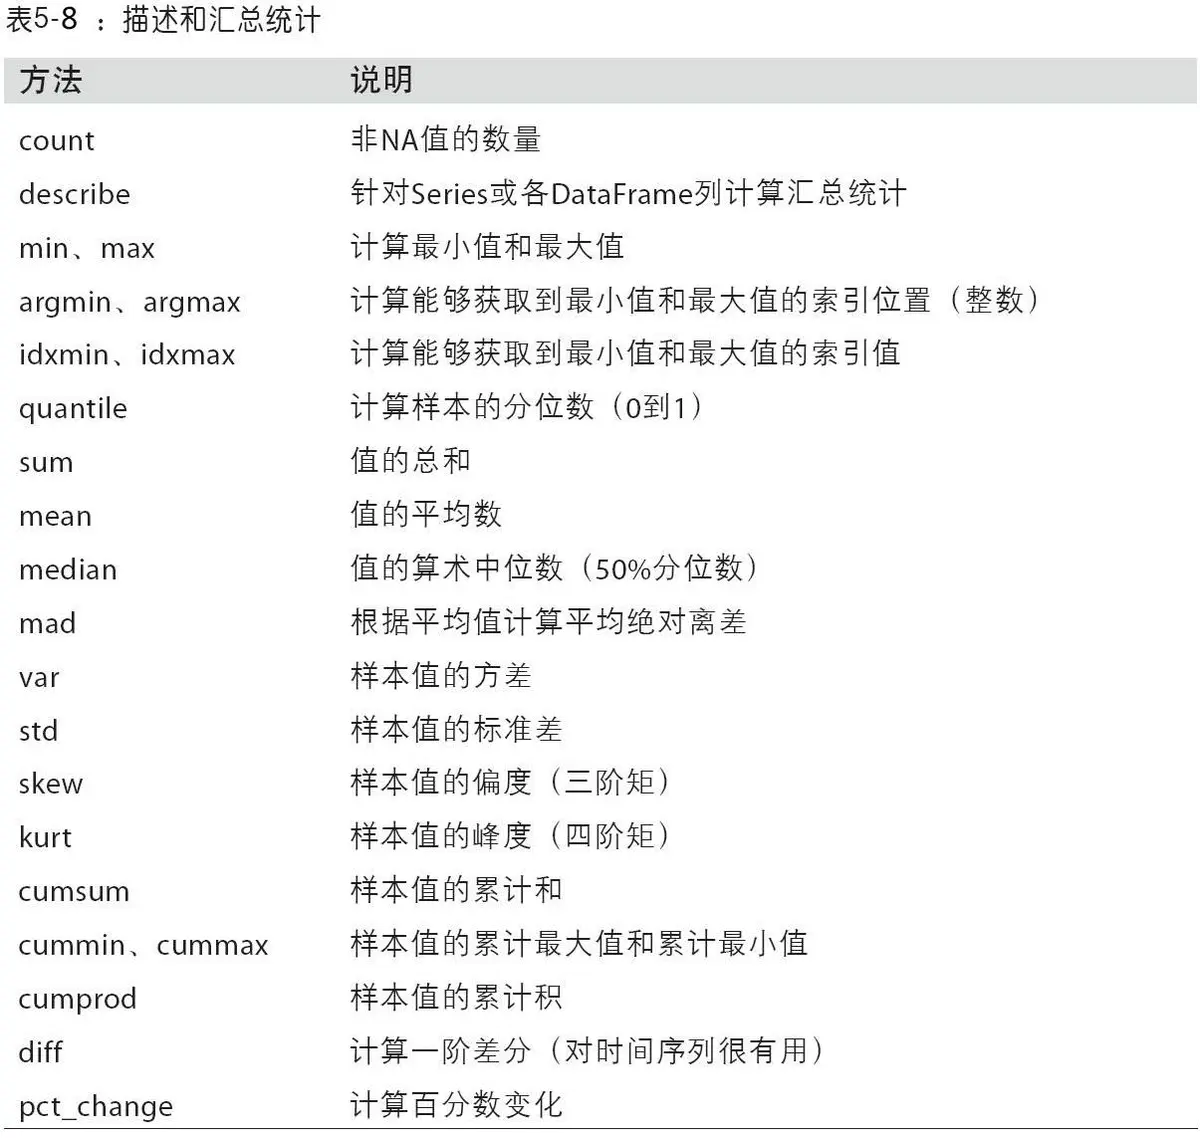

Correlation and Covariance（相关系数与协方差）

In [162]:
conda install pandas-datareader

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [163]:
import pandas_datareader.data as web

D:\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [175]:
# 使用pandas_datareader模块下载一些股票数据
all_data = {ticker: web.get_data_yahoo(ticker)
           for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}
price = pd.DataFrame({ticker: data['Adj Close']
                     for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume']
                     for ticker, data in all_data.items()})

In [176]:
price[-10:-1]

,AAPL,IBM,MSFT,GOOG
Date,,,,
2020-06-01,321.850006,124.889999,182.830002,1431.819946
2020-06-02,323.339996,126.000000,184.910004,1439.219971
2020-06-03,325.119995,129.050003,185.360001,1436.380005
2020-06-04,322.320007,128.889999,182.919998,1412.180054
2020-06-05,331.500000,132.059998,187.199997,1438.390015
2020-06-08,333.459991,135.750000,188.360001,1446.609985
2020-06-09,343.989990,131.869995,189.800003,1456.160034
2020-06-10,352.839996,129.869995,196.839996,1465.849976
2020-06-11,335.899994,118.010002,186.270004,1403.839966


In [174]:
price.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2020-06-08,333.459991,135.750000,188.360001,1446.609985
2020-06-09,343.989990,131.869995,189.800003,1456.160034
2020-06-10,352.839996,129.869995,196.839996,1465.849976
2020-06-11,335.899994,118.010002,186.270004,1403.839966
2020-06-12,338.799988,121.910004,187.740005,1413.180054


In [173]:
volume.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2020-06-08,23913600.0,5370500.0,33211600.0,1404200
2020-06-09,36928100.0,5393600.0,29783900.0,1409200
2020-06-10,41662900.0,4734800.0,43872300.0,1525200
2020-06-11,50415600.0,11763600.0,52854700.0,1991300
2020-06-12,50001500.0,6218100.0,43345700.0,1944200


In [172]:
returns = price.pct_change() # 百分比变化
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2020-06-08,0.005912,0.027942,0.006197,0.005715
2020-06-09,0.031578,-0.028582,0.007645,0.006602
2020-06-10,0.025728,-0.015166,0.037092,0.006654
2020-06-11,-0.048010,-0.091322,-0.053698,-0.042303
2020-06-12,0.008634,0.033048,0.007892,0.006653


In [177]:
returns['MSFT'].corr(returns['IBM']) #corresponding: 相关系数

0.5955725123712792

In [178]:
returns['MSFT'].cov(returns['IBM']) # covariance: 协方差

0.00016576313443183543

In [179]:
returns.MSFT.corr(returns.IBM) #MSTF是合理的朋友python属性，可用此语法选择列

0.5955725123712792

In [180]:
# 以DataFrame的形式分别返回完整的相关系数或协方差矩阵
returns.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.529370,0.713068,0.643896
IBM,0.529370,1.000000,0.595573,0.527776
MSFT,0.713068,0.595573,1.000000,0.751875
GOOG,0.643896,0.527776,0.751875,1.000000


In [181]:
returns.cov()

,AAPL,IBM,MSFT,GOOG
AAPL,0.000332,0.000155,0.000225,0.000201
IBM,0.000155,0.000259,0.000166,0.000146
MSFT,0.000225,0.000166,0.000299,0.000223
GOOG,0.000201,0.000146,0.000223,0.000295


In [184]:
returns.corrwith(volume, axis = 0) #计算按列名配对的相关系数

AAPL   -0.140641
IBM    -0.113600
MSFT   -0.067271
GOOG   -0.039279
dtype: float64

### Unique Values, Value Counts, and Membership（唯一值、值计数以及成员资格）

In [186]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [187]:
uniques = obj.unique() # 得到Series中的唯一值数组

In [188]:
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [189]:
obj.value_counts() #各个值出现次数

a    3
c    3
b    2
d    1
dtype: int64

In [190]:
#pd.value_counts()是顶级的pandas方法，method取消排序
pd.value_counts(obj, sort = False) 

c    3
d    1
a    3
b    2
dtype: int64

In [191]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [192]:
mask = obj.isin(['b', 'c']) # isin用于判断矢量化集合的成员资格
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [193]:
obj[mask] # 利用Series.isin()过滤数据

0    c
5    b
6    b
7    c
8    c
dtype: object

In [202]:
to_match = pd.Series(['c', 'a', 'b','b', 'c', 'a'])
unique_vals = pd.Series(['c', 'b', 'a'])
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2], dtype=int64)

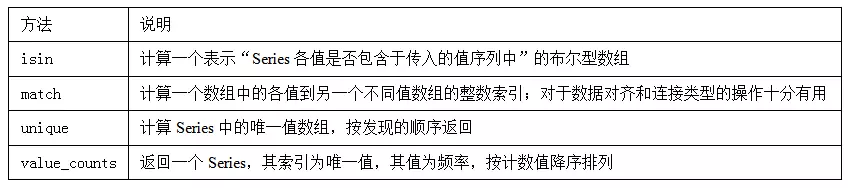

In [206]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                    'Qu2': [2, 3, 1, 2, 3],
                    'Qu3': [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [207]:
result = data.apply(pd.value_counts).fillna(0) # 返回每个列中这些值的相应计数

In [208]:
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0
